# Basic Path Setup

In [3]:
%load_ext autoreload
%autoreload
from personlab.data import coco

base_dir = '/home/ubuntu/personlab-tf/dataset/coco/'
#base_dir = '/Users/minsubsim/work/personlab-tf/dataset/coco/'
anno_dir = base_dir + 'annotations/'
train_base_dir = base_dir + 'train2017/'
val_base_dir = base_dir + 'val2017/'

train_inst_json = anno_dir + 'instances_train2017.json'
train_person_json = anno_dir + 'person_keypoints_train2017.json'
val_inst_json = anno_dir + 'instances_val2017.json'
val_person_json = anno_dir + 'person_keypoints_val2017.json'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Training Script

In [ ]:
from personlab.model import train
from personlab.models.mobilenet_v2 import mobilenet_v2_model
gen = coco.CocoDataGenerator(train_base_dir, train_inst_json, train_person_json)

pm_check_path = 'pretrained/mobilenet/mobilenet_v2_1.0_224.ckpt'
log_dir = 'logs/sample/'

train(mobilenet_v2_model, gen.loader, pm_check_path, log_dir)

loading annotations into memory...
Done (t=17.27s)
creating index...
index created!
loading annotations into memory...
Done (t=7.49s)
creating index...
index created!
Instructions for updating:
Please switch to tf.train.MonitoredTrainingSession
INFO:tensorflow:Restoring parameters from pretrained/mobilenet/mobilenet_v2_1.0_224.ckpt
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Starting Session.
INFO:tensorflow:Saving checkpoint to path logs/sample/model.ckpt
INFO:tensorflow:Starting Queues.
INFO:tensorflow:global_step/sec: 0
INFO:tensorflow:Recording summary at step 0.
INFO:tensorflow:Recording summary at step 17.
INFO:tensorflow:global_step/sec: 0.0623836
INFO:tensorflow:global step 99: loss = 1.9578 (1.907 sec/step)
INFO:tensorflow:global step 199: loss = 1.4621 (1.711 sec/step)
INFO:tensorflow:Saving checkpoint to path logs/sample/model.ckpt
INFO:tensorflow:global_step/sec: 0.609936
INFO:tensorflow:Recording summary at step 201.
I

INFO:tensorflow:global step 6599: loss = 0.9311 (1.591 sec/step)
INFO:tensorflow:global step 6699: loss = 1.7317 (0.993 sec/step)
INFO:tensorflow:global step 6799: loss = 0.9946 (1.628 sec/step)
INFO:tensorflow:Recording summary at step 6810.
INFO:tensorflow:global step 6899: loss = 1.4962 (1.128 sec/step)
INFO:tensorflow:global step 6999: loss = 1.4084 (1.465 sec/step)
INFO:tensorflow:Saving checkpoint to path logs/sample/model.ckpt
INFO:tensorflow:Recording summary at step 7014.
INFO:tensorflow:global step 7099: loss = 0.9454 (1.439 sec/step)
INFO:tensorflow:global step 7199: loss = 1.7626 (1.232 sec/step)
INFO:tensorflow:Recording summary at step 7237.
INFO:tensorflow:global step 7299: loss = 1.3118 (1.337 sec/step)
INFO:tensorflow:global step 7399: loss = 1.6262 (1.178 sec/step)
INFO:tensorflow:Saving checkpoint to path logs/sample/model.ckpt
INFO:tensorflow:Recording summary at step 7425.
INFO:tensorflow:global step 7499: loss = 1.4945 (1.133 sec/step)
INFO:tensorflow:global step 

INFO:tensorflow:global step 14699: loss = 1.4637 (1.177 sec/step)
INFO:tensorflow:global step 14799: loss = 1.3949 (1.352 sec/step)
INFO:tensorflow:Recording summary at step 14855.
INFO:tensorflow:global step 14899: loss = 0.8881 (1.221 sec/step)
INFO:tensorflow:global step 14999: loss = 0.8372 (1.296 sec/step)
INFO:tensorflow:Saving checkpoint to path logs/sample/model.ckpt
INFO:tensorflow:Recording summary at step 15085.
INFO:tensorflow:global step 15099: loss = 0.7402 (1.309 sec/step)
INFO:tensorflow:global step 15199: loss = 1.0463 (1.647 sec/step)
INFO:tensorflow:global step 15299: loss = 0.7707 (1.150 sec/step)
INFO:tensorflow:Recording summary at step 15316.
INFO:tensorflow:global step 15399: loss = 1.2154 (1.069 sec/step)
INFO:tensorflow:global step 15499: loss = 1.2526 (1.688 sec/step)
INFO:tensorflow:Saving checkpoint to path logs/sample/model.ckpt
INFO:tensorflow:Recording summary at step 15551.
INFO:tensorflow:global step 15599: loss = 1.5410 (1.478 sec/step)
INFO:tensorflo

INFO:tensorflow:global step 22699: loss = 2.0106 (1.381 sec/step)
INFO:tensorflow:global step 22799: loss = 1.1014 (1.209 sec/step)
INFO:tensorflow:global step 22899: loss = 1.0931 (1.183 sec/step)
INFO:tensorflow:Recording summary at step 22902.
INFO:tensorflow:global step 22999: loss = 0.6848 (1.465 sec/step)
INFO:tensorflow:global step 23099: loss = 0.7493 (1.205 sec/step)
INFO:tensorflow:Saving checkpoint to path logs/sample/model.ckpt
INFO:tensorflow:Recording summary at step 23118.
INFO:tensorflow:global step 23199: loss = 1.1453 (1.708 sec/step)
INFO:tensorflow:global step 23299: loss = 0.7327 (1.163 sec/step)
INFO:tensorflow:Recording summary at step 23335.
INFO:tensorflow:global step 23399: loss = 0.5725 (1.505 sec/step)
INFO:tensorflow:global step 23499: loss = 1.0170 (1.492 sec/step)
INFO:tensorflow:Saving checkpoint to path logs/sample/model.ckpt
INFO:tensorflow:Recording summary at step 23556.
INFO:tensorflow:global step 23599: loss = 1.5198 (1.614 sec/step)
INFO:tensorflo

INFO:tensorflow:global step 30699: loss = 1.1677 (1.104 sec/step)
INFO:tensorflow:global step 30799: loss = 0.9761 (1.280 sec/step)
INFO:tensorflow:Recording summary at step 30815.
INFO:tensorflow:global step 30899: loss = 0.6690 (1.287 sec/step)
INFO:tensorflow:global step 30999: loss = 1.0372 (1.152 sec/step)
INFO:tensorflow:Saving checkpoint to path logs/sample/model.ckpt
INFO:tensorflow:Recording summary at step 31033.
INFO:tensorflow:global step 31099: loss = 1.2120 (1.206 sec/step)
INFO:tensorflow:global step 31199: loss = 1.3000 (1.548 sec/step)
INFO:tensorflow:Recording summary at step 31253.
INFO:tensorflow:global step 31299: loss = 1.0860 (1.403 sec/step)
INFO:tensorflow:global step 31399: loss = 0.7129 (1.315 sec/step)
INFO:tensorflow:Saving checkpoint to path logs/sample/model.ckpt
INFO:tensorflow:Recording summary at step 31473.
INFO:tensorflow:global step 31499: loss = 0.9184 (1.606 sec/step)
INFO:tensorflow:global step 31599: loss = 0.9897 (1.206 sec/step)
INFO:tensorflo

# Evaluation Script

In [4]:
import tensorflow as tf
from personlab.model import evaluate
from personlab.models.mobilenet_v2 import mobilenet_v2_model
from tensorflow.python.tools.inspect_checkpoint import print_tensors_in_checkpoint_file

tf.reset_default_graph()
latest_ckp = tf.train.latest_checkpoint('./')


gen = coco.CocoDataGenerator(val_base_dir, val_inst_json, val_person_json)

checkpoint_dir = 'logs/sample/'
checkpoint_path = tf.train.latest_checkpoint(checkpoint_dir)

#print_tensors_in_checkpoint_file(checkpoint_path, all_tensors=False, tensor_name='', all_tensor_names=True)
output = evaluate(mobilenet_v2_model, gen.loader, checkpoint_path, num_batches=2)

loading annotations into memory...
Done (t=0.65s)
creating index...
index created!
loading annotations into memory...
Done (t=0.23s)
creating index...
index created!
INFO:tensorflow:Restoring parameters from logs/sample/model.ckpt-48870


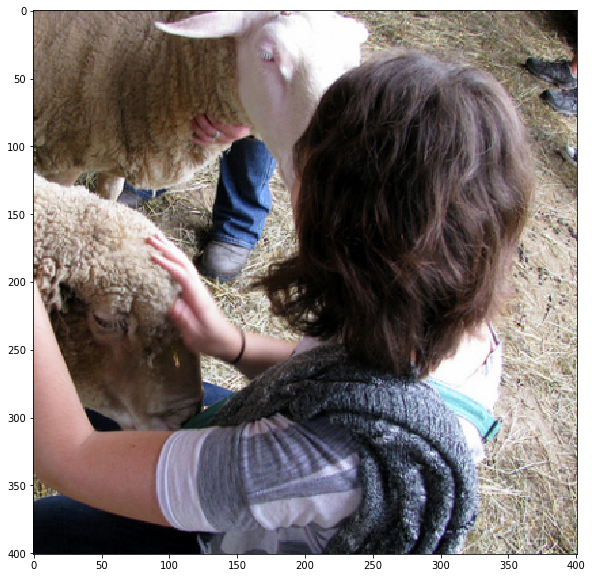

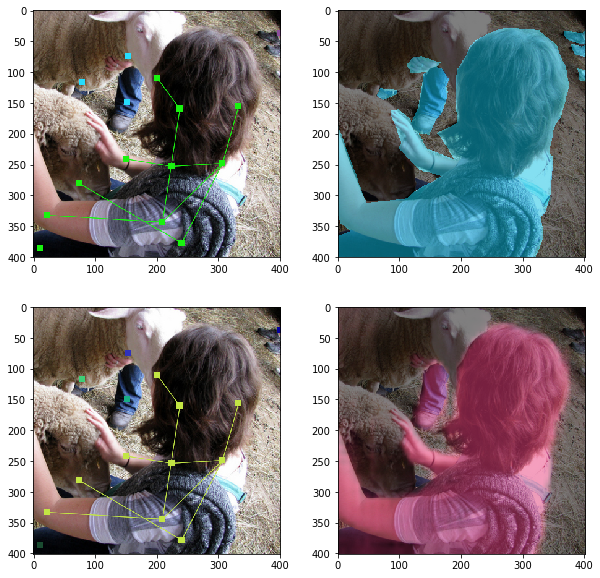

In [14]:
from matplotlib import pyplot as plt
from personlab import display, config
import numpy as np
plt.rcParams['figure.figsize'] = [10, 10]
b_i = 1
plt.figure()
plt.imshow(output['image'][b_i])

plt.figure()
plt.subplot(2, 2, 1)
plt.imshow(display.summary_skeleton(output['image'][b_i], output['kp_map_true'][b_i]))
plt.subplot(2, 2, 2)
plt.imshow(display.show_heatmap(output['image'][b_i], output['seg_true'][b_i]))
plt.subplot(2, 2, 3)
plt.imshow(display.summary_skeleton(output['image'][b_i], output['kp_map_pred'][b_i]))
plt.subplot(2, 2, 4)
plt.imshow(display.show_heatmap(output['image'][b_i], output['seg_pred'][b_i]))
